In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('MOSPP.xlsx')
N, M = list(data.columns[0:2])
data = data.rename (columns = { N: 'Nodo_Inicio',
                                M: 'Nodo_Fin', 
                                'Unnamed: 2': 'Distancia',
                                'Unnamed: 3': 'Emisiones',
                                'Unnamed: 4': 'Riesgo'})


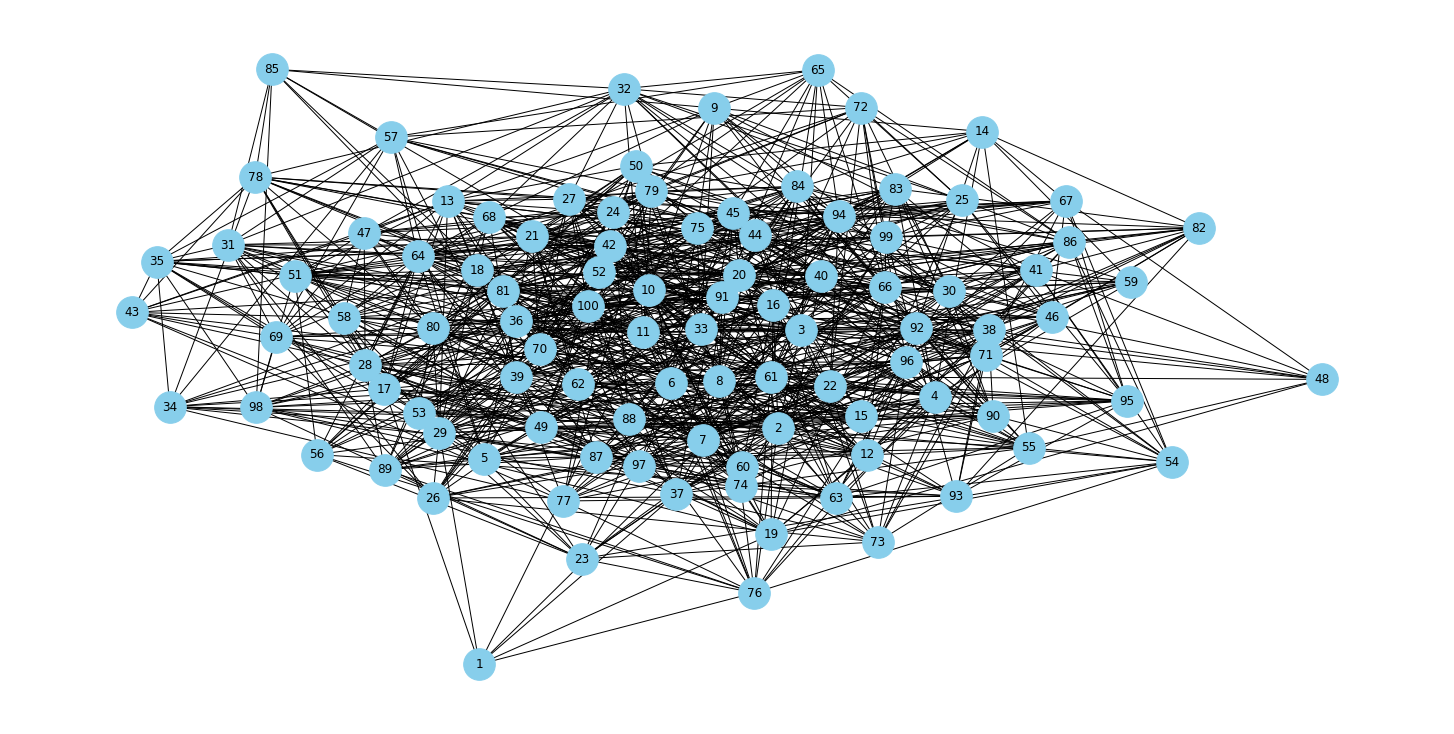

In [3]:
# draw the graph with networkx and matplotlib taking into account the distance and the links between nodes (edges) 

import networkx as nx
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
G = nx.from_pandas_edgelist(data, 'Nodo_Inicio', 'Nodo_Fin', ['Distancia', 'Emisiones', 'Riesgo'], create_using=nx.Graph())
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1000, edge_color='black', linewidths=1, font_size=12)
plt.show()

In [4]:
# create the graph
graph = {}
for i in range(len(data)):
    if data.Nodo_Inicio[i] not in graph:
        graph[data.Nodo_Inicio[i]] = {}
    graph[data.Nodo_Inicio[i]][data.Nodo_Fin[i]] = {'Distancia': data.Distancia[i], 'Emisiones': data.Emisiones[i], 'Riesgo': data.Riesgo[i]}
    if data.Nodo_Fin[i] not in graph:
        graph[data.Nodo_Fin[i]] = {}
    graph[data.Nodo_Fin[i]][data.Nodo_Inicio[i]] = {'Distancia': data.Distancia[i], 'Emisiones': data.Emisiones[i], 'Riesgo': data.Riesgo[i]}
graph

{1: {17: {'Distancia': 74, 'Emisiones': 13, 'Riesgo': 14},
  37: {'Distancia': 61, 'Emisiones': 5, 'Riesgo': 10},
  61: {'Distancia': 12, 'Emisiones': 26, 'Riesgo': 63},
  11: {'Distancia': 42, 'Emisiones': 15, 'Riesgo': 12},
  19: {'Distancia': 13, 'Emisiones': 25, 'Riesgo': 15},
  29: {'Distancia': 47, 'Emisiones': 14, 'Riesgo': 6},
  76: {'Distancia': 77, 'Emisiones': 13, 'Riesgo': 13}},
 17: {1: {'Distancia': 74, 'Emisiones': 13, 'Riesgo': 14},
  5: {'Distancia': 62, 'Emisiones': 11, 'Riesgo': 16},
  13: {'Distancia': 80, 'Emisiones': 3, 'Riesgo': 11},
  2: {'Distancia': 80, 'Emisiones': 7, 'Riesgo': 6},
  15: {'Distancia': 64, 'Emisiones': 1, 'Riesgo': 12},
  38: {'Distancia': 84, 'Emisiones': 4, 'Riesgo': 1},
  42: {'Distancia': 25, 'Emisiones': 29, 'Riesgo': 17},
  49: {'Distancia': 84, 'Emisiones': 10, 'Riesgo': 3},
  60: {'Distancia': 16, 'Emisiones': 31, 'Riesgo': 34},
  64: {'Distancia': 67, 'Emisiones': 5, 'Riesgo': 2},
  81: {'Distancia': 96, 'Emisiones': 3, 'Riesgo': 3},


In [8]:

def dijkstra(graph, start, end):
    shortest_distance = {}
    short_emisiones = {}
    short_riesgo = {}

    predecessor = {}
    unseenNodes = graph
    infinity = 9999999

    path = []
    for node in unseenNodes:
        shortest_distance[node] = infinity
        short_emisiones[node] = infinity
        short_riesgo[node] = infinity
    

    shortest_distance[start] = 0
    short_emisiones[start] = 0
    short_riesgo[start] = 0

    while unseenNodes:
        minNode = None

        for node in unseenNodes:

            if minNode is None:
                minNode = node
            elif shortest_distance[node] < shortest_distance[minNode] and short_emisiones[node] < short_emisiones[minNode] and short_riesgo[node] < short_riesgo[minNode]:
                minNode = node

        for childNode, weight in graph[minNode].items():
            # condition for not cosiderate dominated paths 
            if (weight['Distancia'] + shortest_distance[minNode] < shortest_distance[childNode] and
                weight['Emisiones'] + short_emisiones[minNode] < short_emisiones[childNode] and
                 weight['Riesgo'] + short_riesgo[minNode] < short_riesgo[childNode]):
                
                shortest_distance[childNode] = weight['Distancia'] + shortest_distance[minNode]
                short_emisiones[childNode] = weight['Emisiones'] + short_emisiones[minNode]
                short_riesgo[childNode] = weight['Riesgo'] + short_riesgo[minNode]
                predecessor[childNode] = minNode
        unseenNodes.pop(minNode)

    currentNode = end
    while currentNode != start:
        try:
            path.insert(0,currentNode)
            currentNode = predecessor[currentNode]
        except KeyError:
            print('Path not reachable')
            break
    path.insert(0,start)
    if shortest_distance[end] != infinity:
        print('Shortest distance is ' + str(shortest_distance[end]))
        print('Shortest emisiones is ' + str(short_emisiones[end]))
        print('Shortest riesgo is ' + str(short_riesgo[end]))

        print('And the path is ' + str(path))
    
        # return nodo start and node destine for each path
        destinos = []
        inicio = []
        for i in range(len(path)-1):
            inicio.append(path[i])
            destinos.append(path[i+1])
            


    return  path, inicio, destinos


path, inicios, destinos = dijkstra(graph.copy(), 1, 100)



Shortest distance is 119
Shortest emisiones is 13
Shortest riesgo is 17
And the path is [1, 37, 100]


In [10]:
# filter the data for the path found

df = data[data['Nodo_Inicio'].isin(inicios)]
df = df[df['Nodo_Fin'].isin(destinos)]

df


,Nodo_Inicio,Nodo_Fin,Distancia,Emisiones,Riesgo
1,1,37,61,5,10
358,37,100,58,8,7
